In [ ]:
import gzip
from tqdm.notebook import tqdm
propFileDict = {}
fileLineCount = 1149471184
with gzip.open('../../gdrive-kgtk-dump-2020-12-07/claims.tsv.gz','r') as fin: 
    headerLine = next(fin).decode("utf-8")
#     tstCount = 0
    for line in tqdm(fin, total = fileLineCount):
        line = line.decode("utf-8")
        lineP = line.rstrip().split("\t")
        if "external-id" in lineP[-1]:
            continue
        prop = lineP[2]
        print('got line', lineP)
        if prop not in propFileDict:
            propFileDict[prop] = open("../../propertiesSplit/claims."+str(prop)+".tsv","w")
            propFileDict[prop].write(headerLine)
        propFileDict[prop].write(line)
#         tstCount += 1
#         if tstCount == 10:
#             break
    for file1 in propFileDict.values():
        file1.close()

In [2]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), c: (rLabel)-[:P2308]->(parent), d: (node1)-[]->(par), c: (eLabel)-[:P2303]->(eNode)" \
    --where 'nodeProp.label = rLabel and (par = parent or (rLabel = eLabel and node1 = eNode))' \
    --return 'nodeProp.id, node1, nodeProp.label, node2, max(parent) as `node1;ancestor`' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.all.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 19:33:50 sqlstore]: IMPORT graph directly into table graph_11 from /data/wd-correctness/propertiesSplit/claims.P996.tsv ...
[2021-03-12 19:33:51 sqlstore]: IMPORT graph directly into table graph_12 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
^C


In [4]:
!kgtk --debug query -i ../../propertiesSplit/claims.P996.tsv \
    ../../wikidata-20210215/derived.isastar.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q1238720","Q3331189","Q47461344"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P996.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.incorrect.tsv

[2021-03-12 22:33:26 query]: SQL Translation:
---------------------------------------------
  SELECT graph_11_c1."id", graph_11_c1."node1", graph_11_c1."label", graph_11_c1."node2"
     FROM graph_11 AS graph_11_c1, graph_14 AS graph_14_c2
     WHERE graph_11_c1."node1"=graph_14_c2."node1"
     AND (graph_14_c2."node2" IN (?, ?, ?))
  PARAS: ['Q1238720', 'Q3331189', 'Q47461344']
---------------------------------------------


In [7]:
!wc -l ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv

81289 ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P996.correct.tsv


In [8]:
!kgtk --debug query -i ../../propertiesSplit/claims.P991.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q40231"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P991.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P991.incorrect.tsv

[2021-03-12 22:49:54 sqlstore]: IMPORT graph directly into table graph_15 from /data/wd-correctness/propertiesSplit/claims.P991.tsv ...
[2021-03-12 22:49:54 query]: SQL Translation:
---------------------------------------------
  SELECT graph_15_c1."id", graph_15_c1."node1", graph_15_c1."label", graph_15_c1."node2"
     FROM graph_15 AS graph_15_c1, graph_5 AS graph_5_c2
     WHERE graph_15_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q40231']
---------------------------------------------
[2021-03-12 22:49:55 sqlstore]: CREATE INDEX on table graph_15 column node1 ...
[2021-03-12 22:49:55 sqlstore]: ANALYZE INDEX on table graph_15 column node1 ...


In [9]:
!kgtk --debug query -i ../../propertiesSplit/claims.P965.tsv \
    ../../wikidata-20210215/derived.P31P279star.tsv.gz \
    --match "m: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)" \
    --where 'par in ["Q6023295"]' \
    --return 'nodeProp.id, node1, nodeProp.label, node2' \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --graph-cache ~/sqlite3_caches/mandConst001.sqlite3.db ; \
 kgtk --debug ifnotexists -i ../../propertiesSplit/claims.P965.tsv \
    --filter-on ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.correct.tsv \
    --filter-mode NONE \
    --input-keys node1 label \
    --filter-keys node1 label \
    -o ../../constraintsOP/typeConstraint/claims.type-constraints.mandatory.instanceOf.P965.incorrect.tsv

[2021-03-12 23:54:56 sqlstore]: IMPORT graph directly into table graph_16 from /data/wd-correctness/propertiesSplit/claims.P965.tsv ...
[2021-03-12 23:54:56 query]: SQL Translation:
---------------------------------------------
  SELECT graph_16_c1."id", graph_5_c2."node1", graph_16_c1."label", graph_16_c1."node2"
     FROM graph_16 AS graph_16_c1, graph_5 AS graph_5_c2
     WHERE graph_16_c1."node1"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?))
  PARAS: ['Q6023295']
---------------------------------------------
[2021-03-12 23:54:56 sqlstore]: CREATE INDEX on table graph_16 column node1 ...
[2021-03-12 23:54:56 sqlstore]: ANALYZE INDEX on table graph_16 column node1 ...


# Generate Queries

## Type Constraint

### Understand Constraints File

In [118]:
import pandas as pd
df = pd.read_csv('../../constraintsOP/typeConstraint/claims.type-constraints_all.tsv',sep='\t')

In [119]:
df1 = df.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [120]:
df1.head()

,node1,label,node2
0,P1001,P2308,"[Q102496, Q105985, Q1140371, Q1151067, Q119768..."
1,P1001,P2309,[Q30208840]
2,P1002,P2308,[Q630010]
3,P1002,P2309,[Q21514624]
4,P1004,P2308,"[Q2221906, Q23413, Q3947, Q41176, Q88291]"


In [121]:
df1[df1['node1'] == 'P105']

,node1,label,node2
69,P105,P2308,[Q16521]
70,P105,P2309,[Q21503252]
71,P105,P2316,[Q21502408]


### Query Generator

In [122]:
from tqdm.notebook import tqdm
import os.path

cnt = 0
fCnt = 1
for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

#         print(prop, relation, type1, parents, exceptions)

        if relation == "Q21503252":
            parentFile = "P31P279star"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279star"
            parentTitle = 'subclass'
        else:
            parentFile = "isastar"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        if cnt % 150 == 0:
            fOP = open("../../propertiesSplit/checkViolations/typeConstraintValidator" + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'nodeProp.id, node1, nodeProp.label, node2' \
        -o ../../allConstraintsAnalysis/typeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const2_" + str(fCnt) + ".sqlite3.db ; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/typeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/typeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

        cnt += 1
    except:
        print("Something failed for prop:",prop)
    

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


### Analyze Violations

In [4]:
import pandas as pd
import os
from tqdm.notebook import tqdm

typeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

propList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    typeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}}
    filePath = "../../allConstraintsAnalysis/typeConstraint/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        propList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        typeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        

0it [00:00, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2560 [00:00<?, ?it/s]

In [5]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [6]:
recordCount = 0
for elem in typeConstViolations.keys():
    for key1 in typeConstViolations[elem].keys():
        recordCount += typeConstViolations[elem][key1]['correct'] + typeConstViolations[elem][key1]['incorrect']
print(f"{len(propList)} properties processed for type constraint for {recordCount} statements")

1456 properties processed for type constraint for 621229658 statements


In [7]:
import pandas as pd
typeConstDF = pd.DataFrame(violations).T

In [8]:
typeConstDF['violation_ratio'] = typeConstDF.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [9]:
typeConstDF.head()

,correct,incorrect,paths,violation_ratio
P105,2849928,209,[../../allConstraintsAnalysis/typeConstraint/m...,0.000073
P1087,2585953,1331,[../../allConstraintsAnalysis/typeConstraint/m...,0.000515
P1090,994723,1189,[../../allConstraintsAnalysis/typeConstraint/m...,0.001195
P1096,84319,23,[../../allConstraintsAnalysis/typeConstraint/m...,0.000273
P1098,1903,0,[../../allConstraintsAnalysis/typeConstraint/m...,0.000000


In [10]:
typeConstDF[typeConstDF.correct == 0]

,correct,incorrect,paths,violation_ratio
P2912,0,1,[../../allConstraintsAnalysis/typeConstraint/m...,0.01
P7174,0,3,[../../allConstraintsAnalysis/typeConstraint/n...,0.03
P6001,0,16,[../../allConstraintsAnalysis/typeConstraint/n...,0.16
P6014,0,3,[../../allConstraintsAnalysis/typeConstraint/n...,0.03
P7338,0,1,[../../allConstraintsAnalysis/typeConstraint/n...,0.01
P538,0,10,[../../allConstraintsAnalysis/typeConstraint/n...,0.10
P8738,0,14,[../../allConstraintsAnalysis/typeConstraint/n...,0.14
P5589,0,4,[../../allConstraintsAnalysis/typeConstraint/n...,0.04
P6510,0,4,[../../allConstraintsAnalysis/typeConstraint/n...,0.04
P7887,0,1,[../../allConstraintsAnalysis/typeConstraint/n...,0.01


In [11]:
typeConstDF.sort_values(by=['violation_ratio'],ascending=False).head(5)

,correct,incorrect,paths,violation_ratio
P1111,7,46320,[../../allConstraintsAnalysis/typeConstraint/n...,6617.142857
P7535,1,208,[../../allConstraintsAnalysis/typeConstraint/n...,208.000000
P6753,3,425,[../../allConstraintsAnalysis/typeConstraint/n...,141.666667
P768,137,15139,[../../allConstraintsAnalysis/typeConstraint/n...,110.503650
P7290,2,149,[../../allConstraintsAnalysis/typeConstraint/n...,74.500000


In [12]:
typeConstDF.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1001,1169808,65744,[../../allConstraintsAnalysis/typeConstraint/n...,0.056201
P1476,81194083,47204,[../../allConstraintsAnalysis/typeConstraint/n...,0.000581
P1111,7,46320,[../../allConstraintsAnalysis/typeConstraint/n...,6617.142857
P953,1419766,35180,[../../allConstraintsAnalysis/typeConstraint/n...,0.024779
P577,39403027,33977,[../../allConstraintsAnalysis/typeConstraint/n...,0.000862
P50,20087437,33870,[../../allConstraintsAnalysis/typeConstraint/n...,0.001686
P179,549561,32723,[../../allConstraintsAnalysis/typeConstraint/n...,0.059544
P495,1093936,30672,[../../allConstraintsAnalysis/typeConstraint/n...,0.028038
P1082,2911644,29132,[../../allConstraintsAnalysis/typeConstraint/n...,0.010005
P1346,244595,28867,[../../allConstraintsAnalysis/typeConstraint/n...,0.118020


In [13]:
typeConstDF['violation_ratio'].describe()

count    1456.000000
mean        5.286054
std       173.580696
min         0.000000
25%         0.000519
50%         0.006318
75%         0.041744
max      6617.142857
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Type Constraint Violation Ratios')

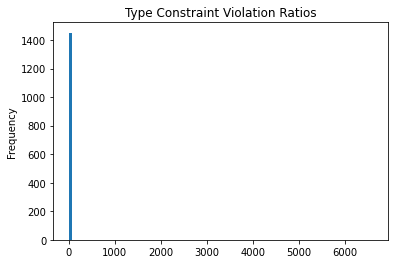

In [14]:
typeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Type Constraint Violation Ratios (<=0.05)')

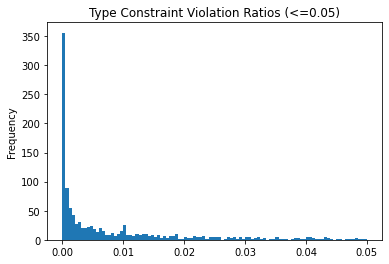

In [15]:
typeConstDF[typeConstDF['violation_ratio'] <= 0.05].violation_ratio.plot.hist(bins=100).set_title("Type Constraint Violation Ratios (<=0.05)")

In [16]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(typeConstDF['violation_ratio'] >= 5.286054)}/{len(typeConstDF)}")

No. of constraints whose violation ratio is greater than mean :22/1456


In [17]:
# typeConstDF.sort_values(by=['incorrect'],ascending=False).head(5).paths.values

In [18]:
# !cat ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P953.incorrect.tsv

In [19]:
typeConstViolations

{'mandatory': {'instanceOf': {'correct': 44946486, 'incorrect': 35027},
  'subclass': {'correct': 1969, 'incorrect': 29},
  'instanceOfOrSubclass': {'correct': 223167, 'incorrect': 204}},
 'suggestion': {'instanceOf': {'correct': 177282, 'incorrect': 18368},
  'subclass': {'correct': 0, 'incorrect': 0},
  'instanceOfOrSubclass': {'correct': 64302, 'incorrect': 2939}},
 'normal': {'instanceOf': {'correct': 498988369, 'incorrect': 797888},
  'subclass': {'correct': 103001, 'incorrect': 9440},
  'instanceOfOrSubclass': {'correct': 75595604, 'incorrect': 265583}}}

In [20]:
typeConstDF['total'] = typeConstDF['correct'] + typeConstDF['incorrect']
typeConstDF.sort_values(by=['total'],ascending=False).head()

,correct,incorrect,paths,violation_ratio,total
P2093,134805889,6527,[../../allConstraintsAnalysis/typeConstraint/n...,0.000048,134812416
P1476,81194083,47204,[../../allConstraintsAnalysis/typeConstraint/n...,0.000581,81241287
P577,39403027,33977,[../../allConstraintsAnalysis/typeConstraint/n...,0.000862,39437004
P1433,36723283,12050,[../../allConstraintsAnalysis/typeConstraint/n...,0.000328,36735333
P1215,33099195,24104,[../../allConstraintsAnalysis/typeConstraint/m...,0.000728,33123299


### Find out time required

In [144]:
from tqdm.notebook import tqdm
import os.path

cnt = 0
fCnt = 1
for prop in tqdm(df1.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = df1[(df1['node1'] == prop) & (df1['label'] == 'P2309')].node2.values[0][0]
        type1 = df1[(df1['node1'] == prop) & (df1['label'] == 'P2316')].node2.values

        parents = df1[(df1['node1'] == prop) & (df1['label'] == 'P2308')].node2.values[0]
        exceptions = df1[(df1['node1'] == prop) & (df1['label'] == 'P2303')].node2.values

#         print(prop, relation, type1, parents, exceptions)

        if relation == "Q21503252":
            parentFile = "P31P279star"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279star"
            parentTitle = 'subclass'
        else:
            parentFile = "isastar"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node1 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        if cnt % 100 == 0:
            fOP = open("../../propertiesSplit/checkViolations/TimedTypeConstraintValidator" + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), d: (node1)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'nodeProp.id, node1, nodeProp.label, node2' \
        -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const2123_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/TimedTypeConstraint_TimedTypeConstraintValidator" + str(fCnt) + ".txt ; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/TimedTypeConstraint/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

        cnt += 1
    except:
        print("Something failed for prop:",prop)
    

  0%|          | 0/4810 [00:00<?, ?it/s]

Something failed for prop: P1249
Something failed for prop: P6790


In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("TimedTypeConstraint_TimedTypeConstraintValidator"):
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes

  0%|          | 0/81 [00:00<?, ?it/s]

In [2]:
print(pd.Series(times).describe())

count     100.000000
mean      479.249890
std       960.978995
min         1.555000
25%        20.188250
50%       118.816000
75%       537.762500
max      5947.610000
dtype: float64


Text(0.5, 1.0, 'Distribution of times (in s) taken for first 100 type constraint checks')

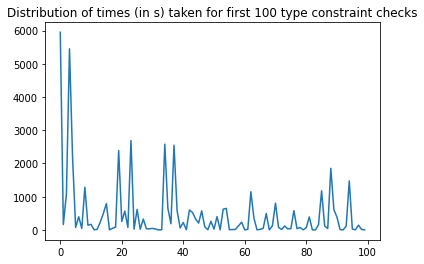

In [3]:
import seaborn as sns
sns.lineplot(data=pd.Series(times)).set_title("Distribution of times (in s) taken for first 100 type constraint checks")

## Value Type Constraint

### Understand Constraints File

In [44]:
import pandas as pd
dfValueType = pd.read_csv('../../constraintsOP/valuetypeConstraint/claims.type-constraints_all1.tsv',sep='\t')

In [45]:
dfValueType = dfValueType.groupby(['node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [46]:
dfValueType.head()

,node1,label,node2
0,P1000,P2308,[Q1241356]
1,P1000,P2309,[Q30208840]
2,P1001,P2308,"[Q20926517, Q2881272, Q2882257, Q3624078, Q389..."
3,P1001,P2309,[Q30208840]
4,P1002,P2308,[Q2576663]


In [17]:
dfValueType['label'].unique()

array(['P2308', 'P2309', 'P2303', 'P2316', 'P6607', 'P2304'], dtype=object)

In [16]:
dfValueType[dfValueType['label'] == '2316']

,node1,label,node2


In [50]:
dfValueType[dfValueType['node1'] == 'P1659']

,node1,label,node2
330,P1659,P2308,[Q18616576]
331,P1659,P2309,[Q21503252]
332,P1659,P2316,[Q21502408]


### Query Generator

In [51]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 1
for prop in tqdm(dfValueType.node1.unique()):
    try:
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
        relation = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2309')].node2.values[0][0]
        type1 = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2316')].node2.values
#         print(type1)

        parents = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2308')].node2.values[0]
        exceptions = dfValueType[(dfValueType['node1'] == prop) & (dfValueType['label'] == 'P2303')].node2.values
        
        if relation == "Q21503252":
            parentFile = "P31"
            parentTitle = 'instanceOf'
        elif relation == "Q21514624":
            parentFile = "P279"
            parentTitle = 'subclass'
        else:
            parentFile = "isa"
            parentTitle = 'instanceOfOrSubclass'

        if len(type1) != 0 and type1[0][0] == "Q21502408":
            typeVal = "mandatory"
        elif len(type1) != 0 and type1[0][0] == "Q62026391":
            typeVal = "suggestion"
        else:
            typeVal = "normal"

        if len(exceptions):
            exceptionPart = "or node2 in " + str(exceptions[0]).replace("'",'"')
        else:
            exceptionPart = ""
        
        folderName = 'valuetypeConstraint'
        shellFileSuffix = 'valueTypeConstraintValidator'
        
        if cnt % 30 == 0:
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
            fCnt += 1
        
        fOP.write("time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
        ../../wikidata-20210215/derived." + parentFile + ".tsv.gz \
        ../../wikidata-20210215/derived.P279star.tsv.gz \
        --match 'm: (node1)-[nodeProp]->(node2), " + parentFile + ": (node2)-[]->(nodex), P279star: (nodex)-[]->(par)' \
        --where 'par in " + str(parents).replace("'",'"') + " " + exceptionPart + "' \
        --return 'nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`' \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --graph-cache ~/sqlite3_caches/const4_" + str(fCnt) + ".sqlite3.db; \
         kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
        --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".correct.tsv \
        --filter-mode NONE \
        --input-keys node1 label \
        --filter-keys node1 label \
        -o ../../allConstraintsAnalysis/" + folderName + "/" + typeVal + "/claims.type-constraints." + parentTitle + "."+ prop +".incorrect.tsv\n")

        cnt += 1
    except:
        print("Something failed for prop:",prop)

  0%|          | 0/932 [00:00<?, ?it/s]

Something failed for prop: P1389


### Analyze Violations

In [16]:
import pandas as pd
import os
from tqdm.notebook import tqdm

valueTypeConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

valueTypePropList = set()

violations = {}

for folder in tqdm(iter(['mandatory', 'suggestion', 'normal'])):
    valueTypeConstViolations[folder] = {'instanceOf': {'correct': 0, 'incorrect': 0}, 'subclass': {'correct': 0, 'incorrect': 0}, 'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}}
    filePath = "../../allConstraintsAnalysis/valuetypeConstraint/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        type1 = filename.split(".")[2]
        prop = filename.split(".")[3]
        valueTypePropList.add(prop)
        correctness = filename.split(".")[4]
        count1 = countLines(filePath+filename)
        valueTypeConstViolations[folder][type1][correctness] += count1
        if prop not in violations:
            violations[prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        violations[prop][correctness] = count1
        violations[prop]['paths'].append(filePath+filename)
        

0it [00:00, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1572 [00:00<?, ?it/s]

In [17]:
# countLines("../../allConstraintsAnalysis/typeConstraint/mandatory/claims.type-constraints.subclass.P534.incorrect.tsv")

In [18]:
recordCount = 0
for elem in valueTypeConstViolations.keys():
    for key1 in valueTypeConstViolations[elem].keys():
        recordCount += valueTypeConstViolations[elem][key1]['correct'] + valueTypeConstViolations[elem][key1]['incorrect']
print(f"{len(valueTypePropList)} properties processed for value type constraint for {recordCount} statements")

897 properties processed for value type constraint for 587254089 statements


In [19]:
import pandas as pd
valTypeConstDF = pd.DataFrame(violations).T

In [20]:
valTypeConstDF['violation_ratio'] = valTypeConstDF.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [21]:
valTypeConstDF.head()

,correct,incorrect,paths,violation_ratio
P1659,33728,1,[../../allConstraintsAnalysis/valuetypeConstra...,0.000030
P185,273396,147,[../../allConstraintsAnalysis/valuetypeConstra...,0.000538
P4006,18,0,[../../allConstraintsAnalysis/valuetypeConstra...,0.000000
P8882,184,0,[../../allConstraintsAnalysis/valuetypeConstra...,0.000000
P2679,898,2,[../../allConstraintsAnalysis/valuetypeConstra...,0.002227


In [22]:
valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5008,0,331026,[../../allConstraintsAnalysis/valuetypeConstra...,3310.260000
P6104,0,9764,[../../allConstraintsAnalysis/valuetypeConstra...,97.640000
P2545,0,1369,[../../allConstraintsAnalysis/valuetypeConstra...,13.690000
P5051,5,59,[../../allConstraintsAnalysis/valuetypeConstra...,11.800000
P1227,2,16,[../../allConstraintsAnalysis/valuetypeConstra...,8.000000
P1880,24,173,[../../allConstraintsAnalysis/valuetypeConstra...,7.208333
P1039,6,41,[../../allConstraintsAnalysis/valuetypeConstra...,6.833333
P516,1379,7993,[../../allConstraintsAnalysis/valuetypeConstra...,5.796229
P1210,1,5,[../../allConstraintsAnalysis/valuetypeConstra...,5.000000
P1455,198,721,[../../allConstraintsAnalysis/valuetypeConstra...,3.641414


In [23]:
valTypeConstDF.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5008,0,331026,[../../allConstraintsAnalysis/valuetypeConstra...,3310.260000
P131,13988974,70786,[../../allConstraintsAnalysis/valuetypeConstra...,0.005060
P69,3678858,36323,[../../allConstraintsAnalysis/valuetypeConstra...,0.009873
P136,1405096,36152,[../../allConstraintsAnalysis/valuetypeConstra...,0.025729
P150,990010,33888,[../../allConstraintsAnalysis/valuetypeConstra...,0.034230
P1433,138352116,22053,[../../allConstraintsAnalysis/valuetypeConstra...,0.000159
P50,39989016,18955,[../../allConstraintsAnalysis/valuetypeConstra...,0.000474
P106,30054276,17832,[../../allConstraintsAnalysis/valuetypeConstra...,0.000593
P400,62062,14718,[../../allConstraintsAnalysis/valuetypeConstra...,0.237150
P276,9014884,12395,[../../allConstraintsAnalysis/valuetypeConstra...,0.001375


In [24]:
valTypeConstDF['violation_ratio'].describe()

count     897.000000
mean        3.950680
std       110.568790
min         0.000000
25%         0.000247
50%         0.003824
75%         0.033113
max      3310.260000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios')

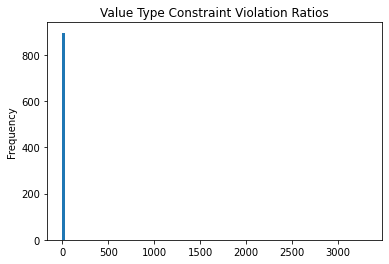

In [25]:
valTypeConstDF['violation_ratio'].plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios")

Text(0.5, 1.0, 'Value Type Constraint Violation Ratios (<=0.04)')

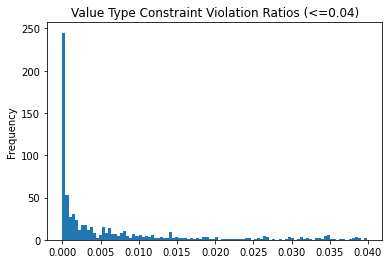

In [26]:
valTypeConstDF[valTypeConstDF['violation_ratio'] <= 0.04].violation_ratio.plot.hist(bins=100).set_title("Value Type Constraint Violation Ratios (<=0.04)")

In [78]:
print(f"No. of constraints whose violation ratio is greater than mean :{sum(valTypeConstDF['violation_ratio'] >= 3.950680)}/{len(valTypeConstDF)}")

No. of constraints whose violation ratio is greater than mean :9/897


In [27]:
# valTypeConstDF.sort_values(by=['violation_ratio'],ascending=False).head().paths.values

In [28]:
# !cat ../../allConstraintsAnalysis/typeConstraint/normal/claims.type-constraints.instanceOf.P7535.incorrect.tsv

In [29]:
valueTypeConstViolations

{'mandatory': {'instanceOf': {'correct': 19317112, 'incorrect': 3339},
  'subclass': {'correct': 45282, 'incorrect': 1},
  'instanceOfOrSubclass': {'correct': 17510, 'incorrect': 35}},
 'suggestion': {'instanceOf': {'correct': 46358, 'incorrect': 474},
  'subclass': {'correct': 179, 'incorrect': 18},
  'instanceOfOrSubclass': {'correct': 0, 'incorrect': 0}},
 'normal': {'instanceOf': {'correct': 280749268, 'incorrect': 689971},
  'subclass': {'correct': 8644651, 'incorrect': 6190},
  'instanceOfOrSubclass': {'correct': 277569918, 'incorrect': 163783}}}

## Item Requires Statement Constraint

### Understand Constraints File

In [49]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/itemRequiresConstraint/claims.type-constraints_all.tsv',sep='\t')

In [50]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [51]:
dfItemRequires['label'].unique()

array(['P2306', 'P2305', 'P2316', 'P2304', 'P2303', 'P6607', 'P4155',
       'P31', 'P2916', 'P4680', 'P2308'], dtype=object)

In [52]:
dfItemRequires['label'].value_counts()

P2306    7182
P2305    2540
P2316    2523
P2303     422
P6607      14
P2304      14
P2916       5
P4680       2
P31         1
P4155       1
P2308       1
Name: label, dtype: int64

In [53]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [54]:
dfItemRequires.head()

label                                  P2303 P2304   P2305   P2306 P2308  \
node1 id                                                                   
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN   NaN     NaN  [P214]   NaN   
P1010 P1010-P2302-Q21503247-56183614-0   NaN   NaN     NaN   [P31]   NaN   
      P1010-P2302-Q21503247-fd256eaf-0   NaN   NaN  [Q794]   [P17]   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN   NaN     NaN   [P31]   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN   NaN     NaN  [P214]   NaN   

label                                         P2316 P2916  P31 P4155 P4680  \
node1 id                                                                     
P1006 P1006-P2302-Q21503247-0451ef47-0          NaN   NaN  NaN   NaN   NaN   
P1010 P1010-P2302-Q21503247-56183614-0          NaN   NaN  NaN   NaN   NaN   
      P1010-P2302-Q21503247-fd256eaf-0  [Q21502408]   NaN  NaN   NaN   NaN   
P1015 P1015-P2302-Q21503247-20e3bfc5-0          NaN   NaN  NaN   NaN   NaN   
P1017 P1017-P2302-Q21503247-bbac2ce3-0          NaN   NaN  NaN   NaN   NaN   

label                                  P6607  
node1 id                                      
P1006 P1006-P2302-Q21503247-0451ef47-0   NaN  
P1010 P1010-P2302-Q21503247-56183614-0   NaN  
      P1010-P2302-Q21503247-fd256eaf-0   NaN  
P1015 P1015-P2302-Q21503247-20e3bfc5-0   NaN  
P1017 P1017-P2302-Q21503247-bbac2ce3-0   NaN

In [55]:
dfItemRequires = dfItemRequires.droplevel(1)

In [56]:
dfItemRequires.head()

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1006,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1015,NaN,NaN,NaN,[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1017,NaN,NaN,NaN,[P214],NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, there is one anomaly where the property does not have a co-dependency constraint associated with it, but still has a link to this constraint.

In [57]:
dfItemRequires[dfItemRequires['P4680'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P5447,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN
P5448,NaN,NaN,[Q55426051],[P5446],NaN,NaN,NaN,NaN,NaN,[Q46466783],NaN


In [80]:
dfItemRequires[dfItemRequires['P2305'].apply(lambda p: type(p) == list)]

label,P2303,P2304,P2305,P2306,P2308,P2316,P2916,P31,P4155,P4680,P6607
node1,,,,,,,,,,,
P1010,NaN,NaN,[Q794],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q20808382, Q28218485, Q3044918]",[P39],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q82955],[P106],NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,[Q5],[P31],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P1045,NaN,NaN,"[Q142, Q71084]",[P27],NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
P980,NaN,NaN,[Q34],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q55],[P17],NaN,[Q21502408],NaN,NaN,NaN,NaN,NaN
P981,NaN,NaN,[Q1852859],[P31],NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Query Generator

#### Version 1 - Mandatory + Suggestion + Normal

In [24]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Sugg_Normal"
shellFileSuffix = 'codepConst_MSN_Validator_new2_'

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + suggestion + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_01_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_01_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  { time kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv --graph-cache ~/sqlite3_caches/codep_new2_01_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt\n"
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv\n"
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv\n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.ts

In [13]:
cnt

527

In [123]:
# from tqdm.notebook import tqdm
# import os.path
# import os
# folderName = 'codependencyConstraint'
# for prop in tqdm(dfItemRequires.index.unique()):
#     for subFolderName in ['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal']:
#         if os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv") and \
#             os.path.isfile("../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv"):
#                 os.system("kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
#                     ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
#                     -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_w_exceptions.tsv")

In [25]:
# import os
# for i in range(1,28):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MSN_Validator_new2_"+str(i)+".sh")

#### Version 2 - Mandatory + Normal

In [28]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand_Normal"
shellFileSuffix = 'codepConst_MN_Validator_new2_'

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory + normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_03_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_03_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  { time kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv --graph-cache ~/sqlite3_caches/codep_new2_03_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt\n"
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv\n"
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv\n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv

In [16]:
cnt

468

In [30]:
# import os
# for i in range(1,25):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_MN_Validator_new2_"+str(i)+".sh")

#### Version 3 - Mandatory

In [26]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Mand"
shellFileSuffix = 'codepConst_M_Validator_new2_'

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = mandatory
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_02_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_02_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  { time kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv --graph-cache ~/sqlite3_caches/codep_new2_02_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt\n"
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv\n"
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv\n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P1627.tsv does not exist


In [18]:
cnt

78

In [27]:
# import os
# for i in range(1,5):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_M_Validator_new2_"+str(i)+".sh")

#### Version 4 - Normal

In [29]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'codependencyConstraint_Final'
subFolderName = "Normal"
shellFileSuffix = 'codepConst_N_Validator_new2_'

for prop in tqdm(dfItemRequires.index.unique()):
#     try:
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        for _, constraint in dfItemRequires.loc[[prop]].iterrows():
            if type(constraint['P2316']) == list:
                if constraint['P2316'][0] == 'Q21502408':
                    mandatory.append(constraint)
                elif constraint['P2316'][0] == 'Q62026391':
                    suggestion.append(constraint)
            else:
                normal.append(constraint)
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        commandInit = "{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv "
        commandOtherFiles = ""
        commandMatch = "--match '"
        commandMatchMoreFiles = [f"{prop}: (node1)-[nodeProp]->(node2)"]
        commandWhere = " --where '"
        commandWhere = []
        
        # Version 1 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        constSet = normal
        
        if len(constSet) == 0:
            continue
        excptns = set()
        for (rowNo, constraint) in enumerate(constSet):
            prop2 = constraint['P2306']
            
            if type(prop2) != list:
                continue
            prop2 = prop2[0]
                
            if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
                print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
                continue
            
            commandOtherFiles += "../../propertiesSplit/claims."+ prop2 +".tsv "
            if type(constraint['P2303']) == list: # Exceptions present
                if len(excptns) == 0:
                    excptns = set(constraint['P2303'])
                else:
                    excptns = excptns.intersection(set(constraint['P2303']))
            if type(constraint['P2305']) == list:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->(node2_{prop2})"]
                commandWhere += ["node2_" + prop2 + " in " + str(list(constraint['P2305'])).replace("'",'"')]
            else:
                commandMatchMoreFiles += [f"{prop2}: (node1)-[]->()"]
#         print(commandMatchMoreFiles)
        if len(commandWhere) == 0:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'"
        else:
            command = commandInit + commandOtherFiles + commandMatch + (", ".join(commandMatchMoreFiles)) + "'" + " --where '"+(" and ".join(commandWhere))+"'"
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        
        if len(excptns) == 0:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_04_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv\n"
            fOP.write(command)
        else:
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/codep_new2_04_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
            fOP.write(command)
            
            command = "  { time kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv --graph-cache ~/sqlite3_caches/codep_new2_04_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/timeLog_" + shellFileSuffix + str(fCnt) + ".txt\n"
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims." + prop + ".incorrect_w_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect.tsv\n"
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".incorrect_w_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + subFolderName + "/claims."+ prop +".correct.tsv\n"
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.tsv does not exist
File: ../../propertiesSplit/claims.P715.tsv does not exist
File: ../../propertiesSplit/claims.P2606.tsv does not exist
File: ../../propertiesSplit/claims.P8303.tsv does not exist
File: ../../propertiesSplit/claims.P1874.tsv

In [20]:
cnt

418

In [31]:
# import os
# for i in range(1,23):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/codepConst_N_Validator_new2_"+str(i)+".sh")

### Merge all correct/incorrect outputs

In [17]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv -v True; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [15]:
# import os
# from tqdm.notebook import tqdm

# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     correct_files_list = " ".join([folderPath + f for f in filter(lambda f: ".correct." in f, os.listdir(folderPath))])
#     incorrect_files_list = " ".join([folderPath + f for f in filter(lambda f: ".incorrect." in f, os.listdir(folderPath))])
# #     print(files_list)
#     os.system("{ kgtk cat -i "+ correct_files_list + " -o "+folderPath+"claims.all.correctSuperSet.tsv; } 2> "+folderPath+"claims.all.correctSuperSet.log")
#     os.system("{ kgtk cat -i "+ incorrect_files_list + " -o "+folderPath+"claims.all.incorrectSuperSet.tsv; } 2> "+folderPath+"claims.all.incorrectSuperSet.log")

0it [00:00, ?it/s]

In [ ]:
# for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
#     folderPath = "../../allConstraintsAnalysis/codependencyConstraint/" + folder + "/"
#     folderPathNew = "../../allConstraintsAnalysis/codependencyConstraint_Final/" + folder + "/"
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.correctSuperSet.tsv --filter-on {folderPath}claims.all.correctSuperSet.tsv -o {folderPathNew}claims.all.correctSuperSet.diff.tsv")
#     os.system(f"screen -dm kgtk ifnotexists -i {folderPathNew}claims.all.incorrectSuperSet.tsv --filter-on {folderPath}claims.all.incorrectSuperSet.tsv -o {folderPathNew}claims.all.incorrectSuperSet.diff.tsv")
    

### Analyze Violations

In [2]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

codepConstViolations = {}
codepConstPropList = set()

# codepConstViolationsSummary = {}

for folder in tqdm(iter(['Mand_Sugg_Normal', 'Mand_Normal', 'Mand', 'Normal'])):
    filePath = "../../allConstraintsAnalysis/codependencyConstraint_Final/"+folder+"/"
    for filename in tqdm(os.listdir(filePath)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        codepConstPropList.add(prop)
        count1 = countLines(filePath+filename)
        if folder not in codepConstViolations:
            codepConstViolations[folder] = {}
        if prop not in codepConstViolations[folder]:
            codepConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        codepConstViolations[folder][prop][correctness] = count1
        codepConstViolations[folder][prop]['paths'].append(filePath+filename)
        
#         if folder not in codepConstViolationsSummary:
#             codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
#         codepConstViolationsSummary[folder][correctness] += count1

0it [00:00, ?it/s]

  0%|          | 0/1195 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/950 [00:00<?, ?it/s]

In [3]:
codepConstViolationsSummary = {}
for folder in codepConstViolations.keys():
    for prop in codepConstViolations[folder].keys():
        if folder not in codepConstViolationsSummary:
            codepConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
        codepConstViolationsSummary[folder]['correct'] += codepConstViolations[folder][prop]['correct']
        codepConstViolationsSummary[folder]['incorrect'] += codepConstViolations[folder][prop]['incorrect']

In [4]:
for elem in codepConstViolationsSummary.keys():
    codepConstViolationsSummary[elem]['total'] = codepConstViolationsSummary[elem]['correct'] + codepConstViolationsSummary[elem]['incorrect']
    codepConstViolationsSummary[elem]['percIncorrect'] = codepConstViolationsSummary[elem]['incorrect'] / codepConstViolationsSummary[elem]['total'] * 100

In [5]:
codepConstViolationsSummary

{'Mand_Sugg_Normal': {'correct': 297984434,
  'incorrect': 4623299,
  'total': 302607733,
  'percIncorrect': 1.5278191849776688},
 'Mand_Normal': {'correct': 273602683,
  'incorrect': 2229992,
  'total': 275832675,
  'percIncorrect': 0.8084582437523038},
 'Mand': {'correct': 3984740,
  'incorrect': 717,
  'total': 3985457,
  'percIncorrect': 0.01799040862816987},
 'Normal': {'correct': 272691305,
  'incorrect': 2227002,
  'total': 274918307,
  'percIncorrect': 0.8100595497992792}}

In [64]:
mandatoryPropCount = 0
suggestionPropCount = 0
normalPropCount = 0
for prop in tqdm(dfItemRequires.index.unique()):
    if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
        continue
    prop = str(prop)
    hasMandatory = False
    hasSuggestion = False
    hasNormal = False

    for _, constraint in dfItemRequires.loc[[prop]].iterrows():
        prop2 = constraint['P2306']
            
        if type(prop2) != list:
            continue
        prop2 = prop2[0]

        if not(os.path.isfile("../../propertiesSplit/claims."+ prop2 +".tsv")):
            print(f"File: ../../propertiesSplit/claims.{prop2}.tsv does not exist")
            continue
            
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                hasMandatory = True
            elif constraint['P2316'][0] == 'Q62026391':
                hasSuggestion = True
        else:
            hasNormal = True
    if hasMandatory:
        mandatoryPropCount += 1
    if hasSuggestion:
        suggestionPropCount += 1
    if hasNormal:
        normalPropCount += 1

  0%|          | 0/3147 [00:00<?, ?it/s]

File: ../../propertiesSplit/claims.P345.tsv does not exist
File: ../../propertiesSplit/claims.P2604.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P1566.tsv does not exist
File: ../../propertiesSplit/claims.P2355.tsv does not exist
File: ../../propertiesSplit/claims.P3350.tsv does not exist
File: ../../propertiesSplit/claims.P1014.tsv does not exist
File: ../../propertiesSplit/claims.P2636.tsv does not exist
File: ../../propertiesSplit/claims.P1771.tsv does not exist
File: ../../propertiesSplit/claims.P2755.tsv does not exist
File: ../../propertiesSplit/claims.P8326.tsv does not exist
File: ../../propertiesSplit/claims.P5128.tsv does not exist
File: ../../propertiesSplit/claims.P1627.tsv does not exist
File: ../../propertiesSplit/claims.P954.tsv does not exist
File: ../../propertiesSplit/claims.P498.tsv does not exist
File: ../../propertiesSplit/claims.P1297.tsv does not exist
File: ../../propertiesSplit/claims.P8680.ts

In [65]:
print(f"No. of props having at least 1 mandatory constraint: {mandatoryPropCount}")
print(f"No. of props having at least 1 suggestion constraint: {suggestionPropCount}")
print(f"No. of props having at least 1 normal constraint: {normalPropCount}")

No. of props having at least 1 mandatory constraint: 76
No. of props having at least 1 suggestion constraint: 95
No. of props having at least 1 normal constraint: 408


#### Version 1 - Mand Sugg Normal

In [6]:
import pandas as pd
codepConstDF1 = pd.DataFrame(codepConstViolations['Mand_Sugg_Normal']).T

In [7]:
codepConstDF1

,correct,incorrect,paths
P1345,113,48,[../../allConstraintsAnalysis/codependencyCons...
P3610,3519,64,[../../allConstraintsAnalysis/codependencyCons...
P1464,35000,831,[../../allConstraintsAnalysis/codependencyCons...
P1629,7531,88,[../../allConstraintsAnalysis/codependencyCons...
P3909,125,76,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P6261,5,0,[../../allConstraintsAnalysis/codependencyCons...
P2873,642,8,[../../allConstraintsAnalysis/codependencyCons...
P2875,3547,16,[../../allConstraintsAnalysis/codependencyCons...
P2876,51,14,[../../allConstraintsAnalysis/codependencyCons...


In [8]:
codepConstDF1['violation_ratio'] = codepConstDF1.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [9]:
codepConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P2302,0,42211,[../../allConstraintsAnalysis/codependencyCons...,422.110000
P2317,102,21320,[../../allConstraintsAnalysis/codependencyCons...,209.019608
P1995,80,9985,[../../allConstraintsAnalysis/codependencyCons...,124.812500
P768,133,15143,[../../allConstraintsAnalysis/codependencyCons...,113.857143
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P1630,111,6220,[../../allConstraintsAnalysis/codependencyCons...,56.036036
P4501,419,22682,[../../allConstraintsAnalysis/codependencyCons...,54.133652
P2715,4,158,[../../allConstraintsAnalysis/codependencyCons...,39.500000
P2351,18,697,[../../allConstraintsAnalysis/codependencyCons...,38.722222


In [43]:
list(codepConstDF1.loc['P2302']['paths'])

['../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.correct.tsv',
 '../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv']

In [45]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand_Sugg_Normal/claims.P2302.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
P10-P2302-Q21502404-d012aef4-0	P10	P2302	Q21502404	normal	wikibase-item
P10-P2302-Q21510851-5224fe0b-0	P10	P2302	Q21510851	normal	wikibase-item
P10-P2302-Q21510852-dde2f0ce-0	P10	P2302	Q21510852	normal	wikibase-item
P10-P2302-Q52004125-d0288d06-0	P10	P2302	Q52004125	normal	wikibase-item
P10-P2302-Q53869507-974ce3b1-0	P10	P2302	Q53869507	normal	wikibase-item
P1000-P2302-Q21510856-b2772a67-0	P1000	P2302	Q21510856	normal	wikibase-item
P1000-P2302-Q21510865-1f5093e9-0	P1000	P2302	Q21510865	normal	wikibase-item
P1000-P2302-Q53869507-36dbee67-0	P1000	P2302	Q53869507	normal	wikibase-item
P1001-P2302-Q21502838-3cc7ade2-0	P1001	P2302	Q21502838	normal	wikibase-item


In [10]:
codepConstDF1.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.240196
P734,2001246,704728,[../../allConstraintsAnalysis/codependencyCons...,0.352145
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.014035
P195,1132062,384602,[../../allConstraintsAnalysis/codependencyCons...,0.339736
P569,4646728,241105,[../../allConstraintsAnalysis/codependencyCons...,0.051887
P131,10056935,198870,[../../allConstraintsAnalysis/codependencyCons...,0.019774
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000658
P570,2332611,94455,[../../allConstraintsAnalysis/codependencyCons...,0.040493
P1540,143802,93033,[../../allConstraintsAnalysis/codependencyCons...,0.646952


In [11]:
codepConstDF1['violation_ratio'].describe()

count    527.000000
mean       3.731911
std       30.036451
min        0.000000
25%        0.001076
50%        0.029891
75%        0.352771
max      463.270000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios')

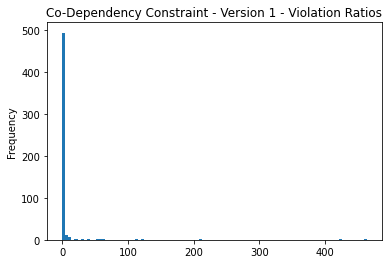

In [12]:
codepConstDF1['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5')

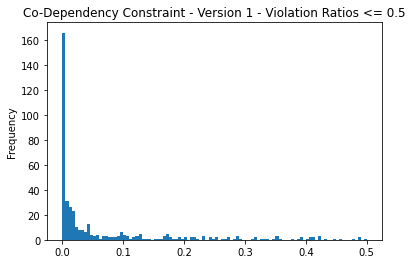

In [13]:
codepConstDF1[codepConstDF1['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 1 - Violation Ratios <= 0.5")

In [69]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF1['violation_ratio'] >= 3.539484)}/{len(codepConstDF1)}")

No. of properties whose violation ratio is greater than mean: 36/527


#### Version 2 - Mand Normal

In [15]:
import pandas as pd
codepConstDF2 = pd.DataFrame(codepConstViolations['Mand_Normal']).T

In [16]:
codepConstDF2

,correct,incorrect,paths
P1196,85037,3039,[../../allConstraintsAnalysis/codependencyCons...
P1018,156,28,[../../allConstraintsAnalysis/codependencyCons...
P1685,4321,0,[../../allConstraintsAnalysis/codependencyCons...
P1843,575709,250,[../../allConstraintsAnalysis/codependencyCons...
P1538,194334,152,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P2900,21844,813,[../../allConstraintsAnalysis/codependencyCons...
P2916,0,1,[../../allConstraintsAnalysis/codependencyCons...
P2923,2687,2738,[../../allConstraintsAnalysis/codependencyCons...
P2929,5511,81,[../../allConstraintsAnalysis/codependencyCons...


In [17]:
codepConstDF2['violation_ratio'] = codepConstDF2.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [18]:
codepConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P1995,80,9985,[../../allConstraintsAnalysis/codependencyCons...,124.812500
P768,133,15143,[../../allConstraintsAnalysis/codependencyCons...,113.857143
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P4501,419,22682,[../../allConstraintsAnalysis/codependencyCons...,54.133652
P2715,4,158,[../../allConstraintsAnalysis/codependencyCons...,39.500000
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2376,1,19,[../../allConstraintsAnalysis/codependencyCons...,19.000000
P3912,297,3705,[../../allConstraintsAnalysis/codependencyCons...,12.474747
P2720,12,134,[../../allConstraintsAnalysis/codependencyCons...,11.166667


In [19]:
codepConstDF2.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.240196
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.014035
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000658
P1435,1893874,79479,[../../allConstraintsAnalysis/codependencyCons...,0.041966
P708,45253,54258,[../../allConstraintsAnalysis/codependencyCons...,1.198992
P197,117522,49904,[../../allConstraintsAnalysis/codependencyCons...,0.424635
P1598,36978,46481,[../../allConstraintsAnalysis/codependencyCons...,1.256991
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,10.339801


In [20]:
codepConstDF2['violation_ratio'].describe()

count    468.000000
mean       2.322334
std       23.177891
min        0.000000
25%        0.000663
50%        0.014876
75%        0.177430
max      463.270000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios')

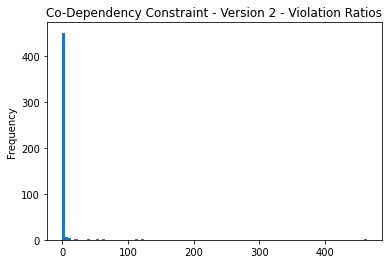

In [21]:
codepConstDF2['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5')

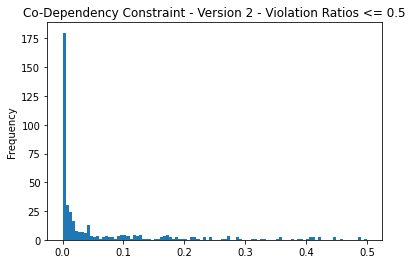

In [22]:
codepConstDF2[codepConstDF2['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 2 - Violation Ratios <= 0.5")

In [70]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF2['violation_ratio'] >= 2.290915)}/{len(codepConstDF2)}")

No. of properties whose violation ratio is greater than mean: 30/468


#### Version 3 - Mand

In [24]:
import pandas as pd
codepConstDF3 = pd.DataFrame(codepConstViolations['Mand']).T

In [25]:
codepConstDF3

,correct,incorrect,paths
P1081,12300,0,[../../allConstraintsAnalysis/codependencyCons...
P3744,311,0,[../../allConstraintsAnalysis/codependencyCons...
P2021,2303,1,[../../allConstraintsAnalysis/codependencyCons...
P5982,1326,0,[../../allConstraintsAnalysis/codependencyCons...
P2095,38,3,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P1879,1695,0,[../../allConstraintsAnalysis/codependencyCons...
P3648,7,0,[../../allConstraintsAnalysis/codependencyCons...
P197,167392,34,[../../allConstraintsAnalysis/codependencyCons...
P1990,7619,1,[../../allConstraintsAnalysis/codependencyCons...


In [26]:
codepConstDF3['violation_ratio'] = codepConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [27]:
codepConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P4341,7,1,[../../allConstraintsAnalysis/codependencyCons...,0.142857
P2095,38,3,[../../allConstraintsAnalysis/codependencyCons...,0.078947
P3931,2250,64,[../../allConstraintsAnalysis/codependencyCons...,0.028444
P1731,363,9,[../../allConstraintsAnalysis/codependencyCons...,0.024793
P2009,1019,15,[../../allConstraintsAnalysis/codependencyCons...,0.014720
P246,169,2,[../../allConstraintsAnalysis/codependencyCons...,0.011834
P8264,0,1,[../../allConstraintsAnalysis/codependencyCons...,0.010000
P944,577,4,[../../allConstraintsAnalysis/codependencyCons...,0.006932
P1560,3235,20,[../../allConstraintsAnalysis/codependencyCons...,0.006182


In [83]:
codepConstDF3.loc['P1713']

correct                                                         1980
incorrect                                                          1
paths              [../../allConstraintsAnalysis/codependencyCons...
violation_ratio                                             0.000505
Name: P1713, dtype: object

In [84]:
!head ../../allConstraintsAnalysis/codependencyConstraint_Final/Mand/claims.P1713.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q4681882-P1713-d878eb-9fff460e-0	Q4681882	P1713	"https://heightnetworth.com/adele-givens-net-worth-2020/"	normal	url


In [85]:
!cat ../../allConstraintsAnalysis/codependencyConstraint/Mand/claims.P1713.incorrect.tsv

id	node1	label	node2	rank	node2;wikidatatype
Q1000195-P1713-e792ce-9b50511b-0	Q1000195	P1713	"http://webarchiv.bundestag.de/archive/2007/0206/mdb/mdb13/bio/T/thiesdi0.html"	normal	url
Q100218-P1713-3e741f-4bb9633d-0	Q100218	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/B/bunge_martina.html"	normal	url
Q100250-P1713-33d6e4-326e7a64-0	Q100250	P1713	"http://webarchiv.bundestag.de/archive/2010/0427/bundestag/abgeordnete/bio/B/bauerwo0.html"	normal	url
Q100357-P1713-f75a30-72e42938-0	Q100357	P1713	"http://webarchiv.bundestag.de/archive/2007/0206/mdb/mdb14/bio/J/juengsa0.html"	normal	url
Q100615-P1713-cd17a0-c89f234d-0	Q100615	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/P/ploetz_yvonne.html"	normal	url
Q100617-P1713-2396a5-62789180-0	Q100617	P1713	"http://webarchiv.bundestag.de/archive/2013/1212/bundestag/abgeordnete17/biografien/S/schwanitz_rolf.html"	normal	url
Q100717883-P1713-bd827f-36a0ade3-0	Q1007

In [28]:
codepConstDF3.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P7959,655743,376,[../../allConstraintsAnalysis/codependencyCons...,0.000573
P3931,2250,64,[../../allConstraintsAnalysis/codependencyCons...,0.028444
P5051,1,63,[../../allConstraintsAnalysis/codependencyCons...,63.000000
P915,28364,45,[../../allConstraintsAnalysis/codependencyCons...,0.001587
P451,10502,36,[../../allConstraintsAnalysis/codependencyCons...,0.003428
P197,167392,34,[../../allConstraintsAnalysis/codependencyCons...,0.000203
P1560,3235,20,[../../allConstraintsAnalysis/codependencyCons...,0.006182
P2009,1019,15,[../../allConstraintsAnalysis/codependencyCons...,0.014720
P1731,363,9,[../../allConstraintsAnalysis/codependencyCons...,0.024793
P1196,88070,6,[../../allConstraintsAnalysis/codependencyCons...,0.000068


In [29]:
codepConstDF3['violation_ratio'].describe()

count    78.000000
mean      0.812130
std       7.132861
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000558
max      63.000000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios')

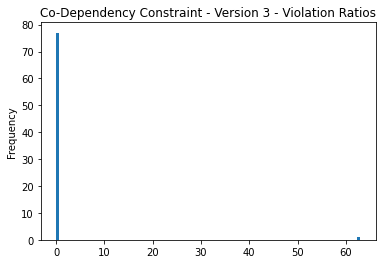

In [30]:
codepConstDF3['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005')

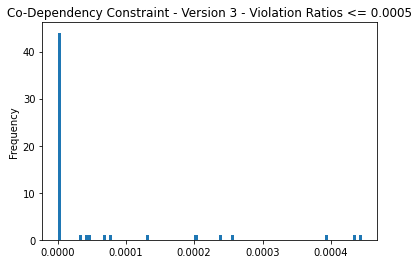

In [31]:
codepConstDF3[codepConstDF3['violation_ratio'] <= 0.0005].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 3 - Violation Ratios <= 0.0005")

In [77]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF3['violation_ratio'] >= 0.922928)}/{len(codepConstDF3)}")

No. of properties whose violation ratio is greater than mean: 1/78


#### Version 4 - Normal

In [33]:
import pandas as pd
codepConstDF4 = pd.DataFrame(codepConstViolations['Normal']).T

In [34]:
codepConstDF4

,correct,incorrect,paths
P1018,156,28,[../../allConstraintsAnalysis/codependencyCons...
P171,2856794,2307,[../../allConstraintsAnalysis/codependencyCons...
P1283,1383,0,[../../allConstraintsAnalysis/codependencyCons...
P1540,236379,456,[../../allConstraintsAnalysis/codependencyCons...
P14,18073,27,[../../allConstraintsAnalysis/codependencyCons...
...,...,...,...
P2876,51,14,[../../allConstraintsAnalysis/codependencyCons...
P2900,21844,813,[../../allConstraintsAnalysis/codependencyCons...
P2916,0,1,[../../allConstraintsAnalysis/codependencyCons...
P2923,2687,2738,[../../allConstraintsAnalysis/codependencyCons...


In [35]:
codepConstDF4['violation_ratio'] = codepConstDF4.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)

In [36]:
codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P1995,80,9985,[../../allConstraintsAnalysis/codependencyCons...,124.812500
P768,133,15143,[../../allConstraintsAnalysis/codependencyCons...,113.857143
P4501,419,22682,[../../allConstraintsAnalysis/codependencyCons...,54.133652
P2715,4,158,[../../allConstraintsAnalysis/codependencyCons...,39.500000
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2376,1,19,[../../allConstraintsAnalysis/codependencyCons...,19.000000
P3912,297,3705,[../../allConstraintsAnalysis/codependencyCons...,12.474747
P2720,12,134,[../../allConstraintsAnalysis/codependencyCons...,11.166667
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,10.339801


In [37]:
# list(codepConstDF4.sort_values(by=['violation_ratio'],ascending=False).head(5).paths)

In [38]:
codepConstDF4.sort_values(by=['incorrect'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2214,2962988,711699,[../../allConstraintsAnalysis/codependencyCons...,0.240196
P433,31028893,435483,[../../allConstraintsAnalysis/codependencyCons...,0.014035
P275,5955,123578,[../../allConstraintsAnalysis/codependencyCons...,20.751973
P2860,174402886,114713,[../../allConstraintsAnalysis/codependencyCons...,0.000658
P1435,1893874,79479,[../../allConstraintsAnalysis/codependencyCons...,0.041966
P708,45253,54258,[../../allConstraintsAnalysis/codependencyCons...,1.198992
P197,117523,49903,[../../allConstraintsAnalysis/codependencyCons...,0.424623
P1598,36978,46481,[../../allConstraintsAnalysis/codependencyCons...,1.256991
P1111,0,46327,[../../allConstraintsAnalysis/codependencyCons...,463.270000
P2248,4020,41566,[../../allConstraintsAnalysis/codependencyCons...,10.339801


In [39]:
codepConstDF4['violation_ratio'].describe()

count    416.000000
mean       2.458610
std       24.392334
min        0.000000
25%        0.001374
50%        0.021510
75%        0.217518
max      463.270000
Name: violation_ratio, dtype: float64

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios')

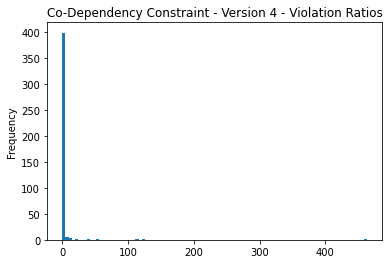

In [40]:
codepConstDF4['violation_ratio'].plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios")

Text(0.5, 1.0, 'Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5')

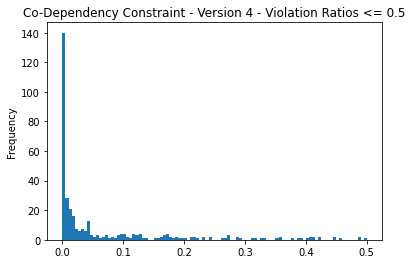

In [41]:
codepConstDF4[codepConstDF4['violation_ratio'] <= 0.5].violation_ratio.plot.hist(bins=100).set_title("Co-Dependency Constraint - Version 4 - Violation Ratios <= 0.5")

In [78]:
print(f"No. of properties whose violation ratio is greater than mean: {sum(codepConstDF4['violation_ratio'] >= 2.414703)}/{len(codepConstDF4)}")

No. of properties whose violation ratio is greater than mean: 25/416


### Find out time required

In [78]:
import pandas as pd
import os
from tqdm.notebook import tqdm

codepConstViolations = {}

codepConstViolations = {}
codepConstPropList = set()

def extractTimes(filename):
    times = []
    with open(filename) as f:
        for line in f:
            if "real" in line:
                line = line.strip()
                time1 = line.split("\t")[1]
                mins, sec = time1.split("m")
                mins = int(mins)
                sec = float(sec[:-1])
                times.append(60 * mins + sec)
    return times

# codepConstViolationsSummary = {}
times = []
timesVersion = {"MSN": [], "MN": [], "M": [], "N": []}
filePath = '/data/wd-correctness/propertiesSplit/checkViolations/exec_logs/'
for filename in tqdm(os.listdir(filePath)):
    if filename.startswith("timeLog_codepConst_"):
        ver = filename.split('_')[2]
        tempTimes = extractTimes(filePath + filename)
        times += tempTimes
        timesVersion[ver] += tempTimes
print(pd.Series(times).describe())

  0%|          | 0/81 [00:00<?, ?it/s]

count    1613.000000
mean       43.621681
std       109.482634
min         0.781000
25%         4.833000
50%        10.424000
75%        32.526000
max      1386.353000
dtype: float64


In [79]:
print(pd.Series(timesVersion['MSN']).describe())

count    574.000000
mean      19.207840
std       44.611055
min        0.781000
25%        4.293250
50%        7.367500
75%       15.204000
max      735.489000
dtype: float64


In [80]:
print(pd.Series(timesVersion['MN']).describe())

count     507.000000
mean       62.641158
std       142.860974
min         0.841000
25%         6.228000
50%        17.467000
75%        47.264500
max      1291.840000
dtype: float64


In [81]:
print(pd.Series(timesVersion['M']).describe())

count     78.000000
mean      28.893218
std       65.301546
min        1.392000
25%        4.018250
50%        8.596000
75%       22.877250
max      302.819000
dtype: float64


In [82]:
print(pd.Series(timesVersion['N']).describe())

count     454.000000
mean       55.779150
std       123.567409
min         0.942000
25%         4.964250
50%        13.229000
75%        47.667000
max      1386.353000
dtype: float64


## Symmetric Constraint (Q21510862)

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [9]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510862)" \
    -o ../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-03-28 11:05:06 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510862']
---------------------------------------------


In [10]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/symmetricConstraint/claims.constraints_list.tsv",sep='\t')

In [11]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [12]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [13]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [14]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [15]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [16]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [17]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [18]:
dfItemRequires.head()

,label,P2303,P2316
node1,id,,
P1322,P1322-P2302-Q21510862-85dea891-0,NaN,[Normal]
P1327,P1327-P2302-Q21510862-a3c3a094-0,NaN,[Normal]
P1382,P1382-P2302-Q21510862-f6bcfecf-0,NaN,[Normal]
P1560,P1560-P2302-Q21510862-fabecaeb-0,NaN,[Q21502408]
P1639,P1639-P2302-Q21510862-384edcd4-0,NaN,[Q21502408]


In [19]:
dfItemRequires = dfItemRequires.droplevel(1)

In [20]:
dfItemRequires.head()

label,P2303,P2316
node1,,
P1322,NaN,[Normal]
P1327,NaN,[Normal]
P1382,NaN,[Normal]
P1560,NaN,[Q21502408]
P1639,NaN,[Q21502408]


### Query Generator

In [21]:
from tqdm.notebook import tqdm
import os.path
import os

cnt = 0
fCnt = 0

folderName = 'symmetricConstraint'
shellFileSuffix = 'symmConst_Validator_'
graph_cache_prefix = 'symm_03'

for row in tqdm(dfItemRequires.iterrows()):
#     try:
        prop = row[0]
        constraint = row[1]
        mandatory = []
        suggestion = []
        normal = []
        prop = str(prop)
        
        if type(constraint['P2316']) == list:
            if constraint['P2316'][0] == 'Q21502408':
                sfname = 'mandatory'
            elif constraint['P2316'][0] == 'Q62026391':
                sfname = 'suggestion'
            elif constraint['P2316'][0] == 'Normal':
                sfname = 'normal'
        else:
            sfname = 'normal'
        
        if not(os.path.isfile("../../propertiesSplit/claims."+ prop +".tsv")):
            continue
                
        command = "{ time kgtk --debug query -i ../../propertiesSplit/claims."+ prop +".tsv \
                    ../../propertiesSplit/claims."+ prop +".copy2.tsv \
                    --match 'tsv: (node1)-[nodeProp]->(node2), copy2: (node2)-[]->(node1)' "
        
        os.system("cp ../../propertiesSplit/claims."+ prop +".tsv ../../propertiesSplit/claims."+ prop +".copy2.tsv")
        
        if cnt % 20 == 0:
            fCnt += 1
            fOP = open("../../propertiesSplit/checkViolations/" + shellFileSuffix + str(fCnt) + ".sh","w")
        command
        if type(constraint['P2303']) != list: # Exceptions not present
            commandRest = " --return 'nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect.tsv\n"
#             print(command)
            fOP.write(command)
        else:
            excptns = constraint['P2303']
            commandRest = " --return 'distinct nodeProp.id, node1 as `node1`, nodeProp.label as `label`, node2 as `node2`'  \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt; \
             kgtk --debug ifnotexists -i ../../propertiesSplit/claims."+ prop +".tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label "
            
            commandOPFile = "-o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +"."
            
            command += commandRest + commandOPFile + "incorrect_wo_exceptions.tsv\n"
#             print(command)
            fOP.write(command)
            
            command = "  { time kgtk --debug query -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
                    --match '(node1)-[]->()' --where 'node1 in " + str(list(excptns)).replace("'",'"') + "' \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
                    --graph-cache ~/sqlite3_caches/"+graph_cache_prefix+"_" + str(fCnt) + ".sqlite3.db; } 2>> ../../propertiesSplit/checkViolations/exec_logs/" + shellFileSuffix + str(fCnt) + ".txt\n"
#             print(command)
            fOP.write(command)
            
            command = "  kgtk --debug ifnotexists -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".incorrect_wo_exceptions.tsv \
            --filter-on ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims." + prop + ".correct_exceptions.tsv \
            --filter-mode NONE \
            --input-keys node1 label \
            --filter-keys node1 label \
            -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".incorrect.tsv\n"
#             print(command)
            fOP.write(command)
            
            command = "  kgtk cat -i ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_wo_exceptions.tsv \
                    ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct_exceptions.tsv \
                    -o ../../allConstraintsAnalysis/" + folderName + "/" + sfname + "/claims."+ prop +".correct.tsv\n"
#             print(command)
            fOP.write(command)
        
        
        cnt += 1
#     except:
#         print("Something failed for prop:",prop)

0it [00:00, ?it/s]

In [22]:
cnt

38

In [23]:
# import os
# for i in range(1,3):
#     os.system("screen -dm sh ../../propertiesSplit/checkViolations/symmConst_Validator_"+str(i)+".sh")

### Analyze Violations

In [46]:
import pandas as pd
import os
from tqdm.notebook import tqdm

symmConstViolations = {}

def countLines(fname):
    cnt = -1
    with open(fname, 'r') as f:
        for line in f:
            cnt += 1
    return cnt

symmConstViolations = {}
symmConstPropList = set()

# codepConstViolationsSummary = {}


filePath = "../../allConstraintsAnalysis/symmetricConstraint/"
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    for filename in tqdm(os.listdir(filePath + folder)):
        prop = filename.split(".")[1]
        correctness = filename.split(".")[2]
        if correctness not in ['correct','incorrect']:
            continue
        symmConstPropList.add(prop)
        count1 = countLines(filePath+folder+'/'+filename)
        if folder not in symmConstViolations:
            symmConstViolations[folder] = {}
        if prop not in symmConstViolations[folder]:
            symmConstViolations[folder][prop] = {'correct': 0, 'incorrect': 0, 'paths': []}
        symmConstViolations[folder][prop][correctness] = count1
        symmConstViolations[folder][prop]['paths'].append(filePath+folder+'/'+filename)

0it [00:00, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [47]:
len(symmConstPropList)

36

In [48]:
symmConstViolationsSummary = {}
for folder in tqdm(iter(['mandatory','normal','suggestion'])):
    symmConstViolationsSummary[folder] = {'correct': 0, 'incorrect': 0}
    for prop in symmConstViolations[folder].keys():
        symmConstViolationsSummary[folder]['correct'] += symmConstViolations[folder][prop]['correct']
        symmConstViolationsSummary[folder]['incorrect'] += symmConstViolations[folder][prop]['incorrect']
    symmConstViolationsSummary[folder]['total'] = symmConstViolationsSummary[folder]['correct'] + symmConstViolationsSummary[folder]['incorrect']
    symmConstViolationsSummary[folder]['percIncorrect'] = symmConstViolationsSummary[folder]['incorrect'] / symmConstViolationsSummary[folder]['total'] * 100
    symmConstViolationsSummary[folder]['propCount'] = len(symmConstViolations[folder].keys())

0it [00:00, ?it/s]

In [49]:
symmConstViolationsSummary

{'mandatory': {'correct': 7439,
  'incorrect': 34,
  'total': 7473,
  'percIncorrect': 0.454971229760471,
  'propCount': 5},
 'normal': {'correct': 6239704,
  'incorrect': 47959,
  'total': 6287663,
  'percIncorrect': 0.7627476218111562,
  'propCount': 28},
 'suggestion': {'correct': 782869,
  'incorrect': 31595,
  'total': 814464,
  'percIncorrect': 3.879238370265598,
  'propCount': 3}}

In [50]:
noOfStmts = 0
for fold in symmConstViolationsSummary.keys():
    noOfStmts += symmConstViolationsSummary[fold]['total']
noOfStmts

7109600

In [51]:
symmConstDF1 = pd.DataFrame(symmConstViolations['mandatory']).T
symmConstDF1['violation_ratio'] = symmConstDF1.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)
symmConstDF1.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2152,75,1,[../../allConstraintsAnalysis/symmetricConstra...,0.013333
P1639,2059,20,[../../allConstraintsAnalysis/symmetricConstra...,0.009713
P1560,3239,13,[../../allConstraintsAnalysis/symmetricConstra...,0.004014
P6185,280,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000
P3364,1786,0,[../../allConstraintsAnalysis/symmetricConstra...,0.000000


In [57]:
symmConstDF2 = pd.DataFrame(symmConstViolations['suggestion']).T
symmConstDF2['violation_ratio'] = symmConstDF2.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)
symmConstDF2.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P2789,103892,6058,[../../allConstraintsAnalysis/symmetricConstra...,0.058311
P1889,505954,23764,[../../allConstraintsAnalysis/symmetricConstra...,0.046969
P197,173023,1773,[../../allConstraintsAnalysis/symmetricConstra...,0.010247


In [64]:
symmConstDF3 = pd.DataFrame(symmConstViolations['normal']).T
symmConstDF3['violation_ratio'] = symmConstDF3.apply(lambda p: p.incorrect / p.correct if p.correct != 0 else p.incorrect/100, axis=1)
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False).head(15)

,correct,incorrect,paths,violation_ratio
P1706,4,49,[../../allConstraintsAnalysis/symmetricConstra...,12.250000
P2652,460,777,[../../allConstraintsAnalysis/symmetricConstra...,1.689130
P521,418,144,[../../allConstraintsAnalysis/symmetricConstra...,0.344498
P2293,9984,1919,[../../allConstraintsAnalysis/symmetricConstra...,0.192208
P3032,1674,320,[../../allConstraintsAnalysis/symmetricConstra...,0.191159
P1382,10807,1587,[../../allConstraintsAnalysis/symmetricConstra...,0.146849
P1327,7754,638,[../../allConstraintsAnalysis/symmetricConstra...,0.082280
P451,9549,749,[../../allConstraintsAnalysis/symmetricConstra...,0.078438
P3403,2130,110,[../../allConstraintsAnalysis/symmetricConstra...,0.051643
P460,238980,8022,[../../allConstraintsAnalysis/symmetricConstra...,0.033568


In [73]:
# !head ../../allConstraintsAnalysis/symmetricConstraint/normal/claims.P3032.incorrect.tsv



Text(0.5, 1.0, 'Symmetric Normal Constraint - Violation Ratios')

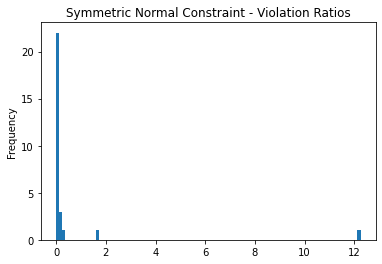

In [77]:
symmConstDF3.sort_values(by=['violation_ratio'],ascending=False)['violation_ratio'].plot.hist(bins=100).set_title("Symmetric Normal Constraint - Violation Ratios")

## Inverse Constraint (Q21510855) - Pending

This constraint says, if node1 has a property with this constraint, then both `(node1)-[prop]->(node2)` and `(node2)-[prop]->(node1)` must be present with few exceptions

### Constraints File

In [21]:
!kgtk --debug query -i ../../gdrive-kgtk-dump-2020-12-07/claims.properties.tsv.gz \
    ../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz \
    --match "p: (nodeProp1)-[nodePropEdge:P2302]->(:Q21510855)" \
    -o ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv \
    --graph-cache ~/sqlite3_caches/temp1345.valuetype.sqlite3.db

[2021-03-28 12:37:57 query]: SQL Translation:
---------------------------------------------
  SELECT *
     FROM graph_1 AS graph_1_c1
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=?
  PARAS: ['P2302', 'Q21510855']
---------------------------------------------


In [23]:
!head ../../constraintsOP/inverseConstraint/claims.constraints_list.tsv

id	node1	label	node2	rank	node2;wikidatatype
P1026-P2302-Q21510855-adc83b86-0	P1026	P2302	Q21510855	normal	wikibase-item
P1029-P2302-Q21510855-6b55e057-0	P1029	P2302	Q21510855	normal	wikibase-item
P115-P2302-Q21510855-f7aa0b78-0	P115	P2302	Q21510855	normal	wikibase-item
P1151-P2302-Q21510855-0d9aa9c6-0	P1151	P2302	Q21510855	normal	wikibase-item
P1204-P2302-Q21510855-e3d53bb6-0	P1204	P2302	Q21510855	normal	wikibase-item
P1283-P2302-Q21510855-0e7699bb-0	P1283	P2302	Q21510855	normal	wikibase-item
P1308-P2302-Q21510855-2aba96b7-0	P1308	P2302	Q21510855	normal	wikibase-item
P1365-P2302-Q21510855-c809b758-0	P1365	P2302	Q21510855	normal	wikibase-item
P1366-P2302-Q21510855-eee12ef8-0	P1366	P2302	Q21510855	normal	wikibase-item


In [22]:
import pandas as pd
qualiDF = pd.read_csv("../../gdrive-kgtk-dump-2020-12-07/qualifiers.properties.tsv.gz",sep='\t')
constDF = pd.read_csv("../../constraintsOP/inverseConstraint/claims.constraints_list.tsv",sep='\t')

In [11]:
constDF2 = constDF.set_index('id').join(qualiDF.set_index('node1'),rsuffix='_qualifier').drop(columns=['id', 'node2;wikidatatype_qualifier', 'rank', 'node2', 'label', 'node2;wikidatatype']).rename(columns={'label_qualifier':'label', 'node2_qualifier': 'node2'})
constDF2 = constDF2.reset_index()
constDF2 = constDF2.rename(columns={'index':'id'})
constDF2['label'] = constDF2.label.fillna("P2316")
constDF2['node2'] = constDF2.node2.fillna("Normal")

In [12]:
constDF2.to_csv("../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv",sep="\t",index=False)

In [13]:
import pandas as pd
import math
dfItemRequires = pd.read_csv('../../constraintsOP/symmetricConstraint/claims.constraints_all.tsv',sep='\t')

In [14]:
dfItemRequires = dfItemRequires.groupby(['id','node1','label']).node2.apply(lambda p: p.tolist()).reset_index()

In [15]:
dfItemRequires['label'].unique()

array(['P2316', 'P2303'], dtype=object)

In [16]:
dfItemRequires['label'].value_counts()

P2316    42
P2303     3
Name: label, dtype: int64

In [17]:
#Reference: https://stackoverflow.com/a/17298454
# dfItemRequires.pivot_table('node2', ['node1', 'id'], 'label')
dfItemRequires = dfItemRequires.pivot(index=['node1','id'], columns='label', values='node2')

In [18]:
dfItemRequires.head()

,label,P2303,P2316
node1,id,,
P1322,P1322-P2302-Q21510862-85dea891-0,NaN,[Normal]
P1327,P1327-P2302-Q21510862-a3c3a094-0,NaN,[Normal]
P1382,P1382-P2302-Q21510862-f6bcfecf-0,NaN,[Normal]
P1560,P1560-P2302-Q21510862-fabecaeb-0,NaN,[Q21502408]
P1639,P1639-P2302-Q21510862-384edcd4-0,NaN,[Q21502408]


In [19]:
dfItemRequires = dfItemRequires.droplevel(1)

In [20]:
dfItemRequires.head()

label,P2303,P2316
node1,,
P1322,NaN,[Normal]
P1327,NaN,[Normal]
P1382,NaN,[Normal]
P1560,NaN,[Q21502408]
P1639,NaN,[Q21502408]


# Comparing isa + P279star with isastar

In [13]:
import os
wiki_root_folder = "../../gdrive-kgtk-dump-2020-12-07/"

claims_file = "claims.tsv.gz"
label_file = "labels.en.tsv.gz"

derived_files_root_folder = "../../wikidata-20210215/"
p279file = "derived.P279star.tsv.gz"
isa_file = "derived.isa.tsv.gz"
isa_star_file = "derived.isastar.tsv.gz"

os.environ['CLAIMS'] = wiki_root_folder + claims_file
os.environ['LABEL'] = wiki_root_folder + label_file
os.environ['P279STAR'] = derived_files_root_folder + p279file
os.environ['ISASTAR'] = derived_files_root_folder + isa_star_file
os.environ['ISA'] = derived_files_root_folder + isa_file
os.environ['TEMP'] = "../../temp"

In [14]:
!time kgtk --debug query -i "$CLAIMS" -i "$LABEL" -i "$P279STAR" -i "$ISA"  \
--match '\
  claims: (n1)-[l:P166]->(award), \
  isa: (award)-[]->(x), \
  P279star: (x)-[]->(valid)' \
--where 'valid in ["Q618779", "Q2003221" ,"Q38033430" ,"Q131647" ,"Q193622" ,"Q60754876" ,"Q7810129" ,"Q4164871" ,"Q2658935" ,"Q1046088" ,"Q3001412" ,"Q3320743" ,"Q657438" ,"Q841654" ,"Q103880535"]' \
--return 'distinct n1, l.label as label, award as node2' \
-o "$TEMP/constraint.award.tsv.gz"

[2021-03-13 13:03:17 sqlstore]: IMPORT graph directly into table graph_3 from /data/wd-correctness/wikidata-20210215/derived.P279star.tsv.gz ...
[2021-03-13 13:05:15 sqlstore]: IMPORT graph directly into table graph_4 from /data/wd-correctness/wikidata-20210215/derived.isa.tsv.gz ...
[2021-03-13 13:06:41 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_1_c1."node1", graph_1_c1."label" "_aLias.label", graph_4_c2."node1" "_aLias.node2"
     FROM graph_1 AS graph_1_c1, graph_3 AS graph_3_c3, graph_4 AS graph_4_c2
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=graph_4_c2."node1"
     AND graph_3_c3."node1"=graph_4_c2."node2"
     AND (graph_3_c3."node2" IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?))
  PARAS: ['P166', 'Q618779', 'Q2003221', 'Q38033430', 'Q131647', 'Q193622', 'Q60754876', 'Q7810129', 'Q4164871', 'Q2658935', 'Q1046088', 'Q3001412', 'Q3320743', 'Q657438', 'Q841654', 'Q103880535']
------------------------------------

In [15]:
!time kgtk --debug query -i "$CLAIMS" -i "$LABEL" -i "$P279STAR" -i "$ISA"  \
--match '\
  claims: (n1)-[l:P166]->(award), \
  isa: (award)-[]->(x), \
  P279star: (x)-[]->(valid)' \
--where 'valid in ["Q618779", "Q2003221" ,"Q38033430" ,"Q131647" ,"Q193622" ,"Q60754876" ,"Q7810129" ,"Q4164871" ,"Q2658935" ,"Q1046088" ,"Q3001412" ,"Q3320743" ,"Q657438" ,"Q841654" ,"Q103880535"]' \
--return 'distinct n1, l.label as label, award as node2' \
-o "$TEMP/constraint.award.tsv.gz"

[2021-03-13 14:34:21 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_1_c1."node1", graph_1_c1."label" "_aLias.label", graph_4_c2."node1" "_aLias.node2"
     FROM graph_1 AS graph_1_c1, graph_3 AS graph_3_c3, graph_4 AS graph_4_c2
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=graph_4_c2."node1"
     AND graph_3_c3."node1"=graph_4_c2."node2"
     AND (graph_3_c3."node2" IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?))
  PARAS: ['P166', 'Q618779', 'Q2003221', 'Q38033430', 'Q131647', 'Q193622', 'Q60754876', 'Q7810129', 'Q4164871', 'Q2658935', 'Q1046088', 'Q3001412', 'Q3320743', 'Q657438', 'Q841654', 'Q103880535']
---------------------------------------------

real	4m13.305s
user	0m42.020s
sys	0m7.273s


In [16]:
!time kgtk --debug query -i "$CLAIMS" -i "$LABEL" -i "$ISASTAR"  \
--match '\
  claims: (n1)-[l:P166]->(award), \
  isastar: (award)-[]->(valid)' \
--where 'valid in ["Q618779", "Q2003221" ,"Q38033430" ,"Q131647" ,"Q193622" ,"Q60754876" ,"Q7810129" ,"Q4164871" ,"Q2658935" ,"Q1046088" ,"Q3001412" ,"Q3320743" ,"Q657438" ,"Q841654" ,"Q103880535"]' \
--return 'distinct n1, l.label as label, award as node2' \
-o "$TEMP/constraint.award.tsv.gz"

[2021-03-13 14:38:37 sqlstore]: IMPORT graph directly into table graph_5 from /data/wd-correctness/wikidata-20210215/derived.isastar.tsv.gz ...
[2021-03-13 15:37:18 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_1_c1."node1", graph_1_c1."label" "_aLias.label", graph_1_c1."node2" "_aLias.node2"
     FROM graph_1 AS graph_1_c1, graph_5 AS graph_5_c2
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?))
  PARAS: ['P166', 'Q618779', 'Q2003221', 'Q38033430', 'Q131647', 'Q193622', 'Q60754876', 'Q7810129', 'Q4164871', 'Q2658935', 'Q1046088', 'Q3001412', 'Q3320743', 'Q657438', 'Q841654', 'Q103880535']
---------------------------------------------
[2021-03-13 15:37:18 sqlstore]: CREATE INDEX on table graph_5 column node1 ...
[2021-03-13 16:15:50 sqlstore]: ANALYZE INDEX on table graph_5 column node1 ...

real	109m29.885s
user	90m41.390s
sys	13m3

In [17]:
!time kgtk --debug query -i "$CLAIMS" -i "$LABEL" -i "$ISASTAR"  \
--match '\
  claims: (n1)-[l:P166]->(award), \
  isastar: (award)-[]->(valid)' \
--where 'valid in ["Q618779", "Q2003221" ,"Q38033430" ,"Q131647" ,"Q193622" ,"Q60754876" ,"Q7810129" ,"Q4164871" ,"Q2658935" ,"Q1046088" ,"Q3001412" ,"Q3320743" ,"Q657438" ,"Q841654" ,"Q103880535"]' \
--return 'distinct n1, l.label as label, award as node2' \
-o "$TEMP/constraint.award.tsv.gz"

[2021-03-13 16:28:05 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_1_c1."node1", graph_1_c1."label" "_aLias.label", graph_5_c2."node1" "_aLias.node2"
     FROM graph_1 AS graph_1_c1, graph_5 AS graph_5_c2
     WHERE graph_1_c1."label"=?
     AND graph_1_c1."node2"=graph_5_c2."node1"
     AND (graph_5_c2."node2" IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?))
  PARAS: ['P166', 'Q618779', 'Q2003221', 'Q38033430', 'Q131647', 'Q193622', 'Q60754876', 'Q7810129', 'Q4164871', 'Q2658935', 'Q1046088', 'Q3001412', 'Q3320743', 'Q657438', 'Q841654', 'Q103880535']
---------------------------------------------

real	0m31.045s
user	0m23.087s
sys	0m3.079s
